In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
train_data= pd.read_csv("train_ctrUa4K.csv")
test_data= pd.read_csv("test_lAUu6dG.csv")

In [ ]:
train_data.shape,train_data.dtypes

((614, 13),
 Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object)

1- Variable Identification:
>types of Varibles:
* perdictor variable:
     Loan_ID, Gender, Married, Dependents, Education,
    Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount,
    Loan_Amount_Term, Credit_History, Property_Area,
* Target variable:
    Loan_Status
>Data types of varibles: 
* Numerical Variablea:
      1-continuous Varibles:ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
      2-discret Varible:Credit_History
* catogrical variable:
      1- Gender , Married, Dependents,Education ,Self_Employed,Property_Area,
      Loan_Status(Target) 

      


In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

>> E D A

## Univariate Analysis:
* At this stage, we explore variables one by one

> Continuous Variables:- 

In [ ]:
#ApplicantIncome,CoapplicantIncome,LoanAmount
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1- ApplicantIncome column

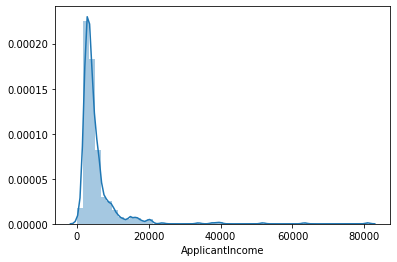

In [ ]:
sn.distplot(train_data['ApplicantIncome'])

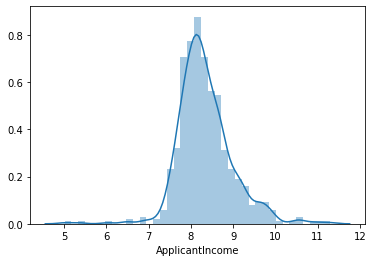

In [ ]:
# we transform ApplicantIncome by log
sn.distplot(np.log(train_data['ApplicantIncome']))

2- Co applicantIncome column

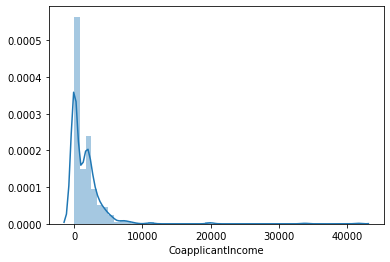

In [ ]:
sn.distplot(train_data['CoapplicantIncome'])

3- LoanAmount  

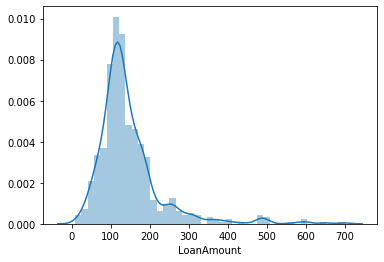

In [ ]:
sn.distplot(train_data['LoanAmount'])

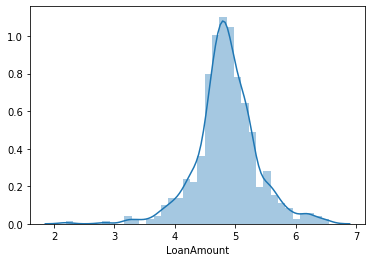

In [ ]:
sn.distplot(np.log(train_data['LoanAmount']))

> Categorical Variables

* Describing Data 

In [ ]:
train_data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002390,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## Bivariate Analysis

In [ ]:
dct={'Y':1,'N':0}
train_data.replace(dct,inplace=True)

> Catogerical Variables with Target

1- Gender &&& Loan_Status

In [ ]:

train_data[['Gender','Loan_Status']].groupby('Gender').mean().sort_values(by='Loan_Status',ascending=False)


,Loan_Status
Gender,
Male,0.693252
Female,0.669643


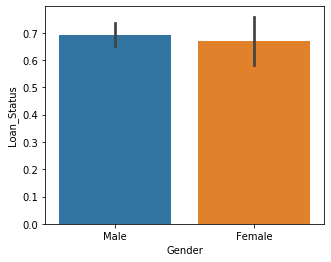

In [ ]:
plt.figure(figsize=(5,4))
data1=pd.concat([train_data['Gender'],train_data['Loan_Status']],axis=1)
sn.barplot(x='Gender', y='Loan_Status',data=data1)

2-  Married &&&& Loan_Status

In [ ]:

train_data[['Married','Loan_Status']].groupby('Married').mean().sort_values(by='Loan_Status',ascending=False)


,Loan_Status
Married,
Yes,0.716080
No,0.629108


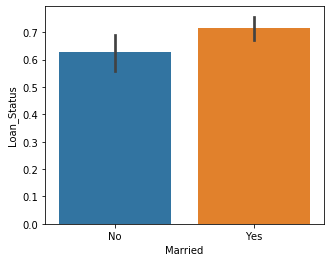

In [ ]:
plt.figure(figsize=(5,4))
data1=pd.concat([train_data['Married'],train_data['Loan_Status']],axis=1)
sn.barplot(x='Married', y='Loan_Status',data=data1)

3- Dependents && Loan_Status

In [ ]:
train_data[['Dependents','Loan_Status']].groupby('Dependents').mean().sort_values(by='Loan_Status',ascending=False)


,Loan_Status
Dependents,
2,0.752475
0,0.689855
1,0.647059
3+,0.647059


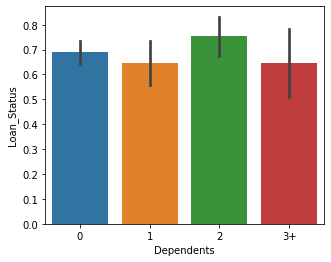

In [ ]:
plt.figure(figsize=(5,4))
data1=pd.concat([train_data['Dependents'],train_data['Loan_Status']],axis=1)
sn.barplot(x='Dependents', y='Loan_Status',data=data1)

4- Education&& Loan_Status

In [ ]:
train_data[['Education','Loan_Status']].groupby('Education').mean().sort_values(by='Loan_Status',ascending=False)


,Loan_Status
Education,
Graduate,0.708333
Not Graduate,0.611940


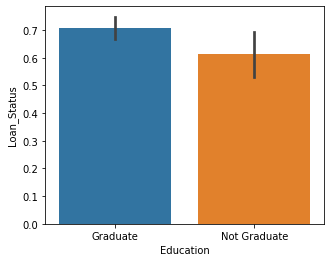

In [ ]:
plt.figure(figsize=(5,4))
data1=pd.concat([train_data['Education'],train_data['Loan_Status']],axis=1)
sn.barplot(x='Education', y='Loan_Status',data=data1)

5- Self_Employed&& Loan_Status

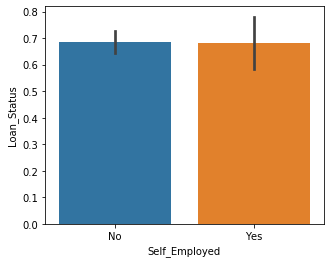

In [ ]:
plt.figure(figsize=(5,4))
data1=pd.concat([train_data['Self_Employed'],train_data['Loan_Status']],axis=1)
sn.barplot(x='Self_Employed', y='Loan_Status',data=data1)

6- Property_Area&&Loan_Status

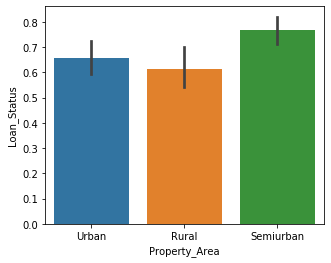

In [ ]:
plt.figure(figsize=(5,4))
data1=pd.concat([train_data['Property_Area'],train_data['Loan_Status']],axis=1)
sn.barplot(x='Property_Area', y='Loan_Status',data=data1)

> continuous Variables With Target

## Dealing With missing Values

#### Missing values in Train Dataset

In [ ]:
total = train_data.isnull().sum()
precent= (train_data.isnull().sum()/train_data.count())*100
missing=pd.concat([total,precent],axis=1,keys=['Missing values','%'])
missing

,Missing values,%
Loan_ID,0,0.000000
Gender,13,2.163062
Married,3,0.490998
Dependents,15,2.504174
Education,0,0.000000
Self_Employed,32,5.498282
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.716216
Loan_Amount_Term,14,2.333333


####  Missing Values in test Dataset 

In [ ]:
total = test_data.isnull().sum()
precent= (test_data.isnull().sum()/test_data.count())*100
missing=pd.concat([total,precent],axis=1,keys=['Missing values','%'])
missing

,Missing values,%
Loan_ID,0,0.000000
Gender,11,3.089888
Married,0,0.000000
Dependents,10,2.801120
Education,0,0.000000
Self_Employed,23,6.686047
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,5,1.381215
Loan_Amount_Term,6,1.662050


#### 1- Dealing With Missing Values in Gender:
it contains 11 values

In [ ]:
print(train_data['Gender'].value_counts())
train_data['Gender'] =train_data['Gender'].replace(np.nan,'Male',inplace=True)
test_data['Gender'] =train_data['Gender'].replace(np.nan,'Male',inplace=True)

Male      489
Female    112
Name: Gender, dtype: int64


#### 2- Dealing With missing Values Married ,Dependents and Self_Employed

In [ ]:
train_data['Married'].value_counts()
train_data['Married'].replace(np.nan,'Yes',inplace=True)
test_data['Married'].replace(np.nan,'Yes',inplace=True)

In [ ]:
train_data['Dependents'].value_counts()
train_data['Dependents'].replace(np.nan,0,inplace=True)
test_data['Dependents'].replace(np.nan,0,inplace=True)
train_data['Self_Employed'].replace(np.nan,'No',inplace=True)
test_data['Self_Employed'].replace(np.nan,'No',inplace=True)
#LoanAmount

3- Dealing With missing Values LoanAmount

In [ ]:
train_data['LoanAmount'].replace(np.nan,train_data['LoanAmount'].median(),inplace=True)
test_data['LoanAmount'].replace(np.nan,train_data['LoanAmount'].median(),inplace=True)

4- Dealing With missing Values Loan_Amount_Term

In [ ]:
train_data['Loan_Amount_Term'].replace(np.nan,360.0,inplace=True)
test_data['Loan_Amount_Term'].replace(np.nan,360.0,inplace=True)

5- Dealing With missing in Values Credit_History column

In [ ]:
train_data['Credit_History'].replace(np.nan,1,inplace=True)
test_data['Credit_History'].replace(np.nan,1,inplace=True)

In [ ]:
train_data['LoanAmount']= pd.cut(train_data['LoanAmount'],3)
train_data['CoapplicantIncome']=pd.cut(train_data['CoapplicantIncome'],5)
train_data['ApplicantIncome']=pd.cut(train_data['ApplicantIncome'],5)


In [ ]:
train_data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
train_data['Dependents'].replace('3+',3,inplace=True)
test_data['Dependents'].replace('3+',3,inplace=True)

In [ ]:
LE= LabelEncoder()
train_data['Gender']= LE.fit_transform(train_data['Gender'])
train_data['Married']= LE.fit_transform(train_data['Married'])
train_data['Property_Area']= LE.fit_transform(train_data['Property_Area'])
train_data['Self_Employed']= LE.fit_transform(train_data['Self_Employed'])
train_data['LoanAmount']= LE.fit_transform(train_data['LoanAmount'])
train_data['Education']= LE.fit_transform(train_data['Education'])
train_data['ApplicantIncome']= LE.fit_transform(train_data['ApplicantIncome'])
train_data['CoapplicantIncome']= LE.fit_transform(train_data['CoapplicantIncome'])


In [ ]:
train_data['Dependents']= train_data['Dependents'].astype(int)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
SC= MinMaxScaler()
#train_data['CoapplicantIncome'] =SC.fit_transform(train_data['CoapplicantIncome'])
#train_data['Loan_Amount_Term'] =SC.fit_transform(train_data['Loan_Amount_Term'])

In [ ]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0,0,0,360.0,1.0,2,1
1,0,1,1,0,0,0,0,0,360.0,1.0,0,0
2,0,1,0,0,1,0,0,0,360.0,1.0,2,1
3,0,1,0,1,0,0,0,0,360.0,1.0,2,1
4,0,0,0,0,0,0,0,0,360.0,1.0,2,1


In [ ]:
y= train_data['Loan_Status']
X= train_data.drop('Loan_Status',axis=1)


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.2,random_state=33)

In [ ]:
#Random forest
RFmodel= RandomForestClassifier(n_estimators=100,max_depth=3,random_state=33)
RFmodel.fit(X_train,y_train)
y_pred= RFmodel.predict(X_test)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Accurecy Score for Random Forest:%f"%accuracy_score(y_pred,y_test))
print('*'*50)
###DecisionTree
DTmodel= DecisionTreeClassifier(max_depth=5,random_state=33)
DTmodel.fit(X_train,y_train)
y_pred= DTmodel.predict(X_test)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Accurecy Score for Decision Tree:%f"%accuracy_score(y_pred,y_test))
print('*'*50)
####SVC
SVCmodel= SVC(kernel= 'rbf')
SVCmodel.fit(X_train,y_train)
y_pred= SVCmodel.predict(X_test)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Accurecy Score for SVC:%f"%accuracy_score(y_pred,y_test))
print('*'*50)
####Logistic Regression
LRmodel= LogisticRegression(fit_intercept=True)
LRmodel.fit(X_train,y_train)
y_pred= LRmodel.predict(X_test)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Accurecy Score for Logestic Regretion:%f"%accuracy_score(y_pred,y_test))
print('*'*50)
###bernoli NB
BNmodel= BernoulliNB(alpha=.01)
BNmodel.fit(X_train,y_train)
y_pred= BNmodel.predict(X_test)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Accurecy Score for Bernoulli:%f"%accuracy_score(y_pred,y_test))
print('*'*50)
####KNeighbors
NeighborsClassmodel= KNeighborsClassifier(n_neighbors=4)
NeighborsClassmodel.fit(X_train,y_train)
y_pred= NeighborsClassmodel.predict(X_test)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Accurecy Score for KNeighbors:%f"%accuracy_score(y_pred,y_test))
print('*'*50)
####LinearDiscriminant
LinearDiscriminantmodel= LinearDiscriminantAnalysis(n_components=10)
LinearDiscriminantmodel.fit(X_train,y_train)
y_pred= LinearDiscriminantmodel.predict(X_test)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Accurecy Score for LinearDiscriminant:%f"%accuracy_score(y_pred,y_test))
print('*'*50)

confusion matrix:
 [[17 19]
 [ 3 84]]
Accurecy Score for Random Forest:0.821138
**************************************************
confusion matrix:
 [[17 19]
 [ 4 83]]
Accurecy Score for Decision Tree:0.813008
**************************************************
confusion matrix:
 [[ 0 36]
 [ 0 87]]
Accurecy Score for SVC:0.707317
**************************************************
confusion matrix:
 [[18 18]
 [ 3 84]]
Accurecy Score for Logestic Regretion:0.829268
**************************************************
confusion matrix:
 [[18 18]
 [ 3 84]]
Accurecy Score for Bernoulli:0.829268
**************************************************
confusion matrix:
 [[18 18]
 [23 64]]
Accurecy Score for KNeighbors:0.666667
**************************************************
confusion matrix:
 [[18 18]
 [ 3 84]]
Accurecy Score for LinearDiscriminant:0.829268
**************************************************


In [ ]:
for i in range(2,200,5):
    print("n:",i)
    RFmodel= RandomForestClassifier(n_estimators=i,max_depth=5,random_state=33)
    RFmodel.fit(X_train,y_train)
    y_pred= RFmodel.predict(X_test)
    print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
    print("Accurecy Score for Random Forest:%f"%accuracy_score(y_pred,y_test))
    print('*'*50)
#####the best estimator n =2 the Accuecy is     

n: 2
confusion matrix:
 [[18 18]
 [ 4 83]]
Accurecy Score for Random Forest:0.821138
**************************************************
n: 7
confusion matrix:
 [[17 19]
 [ 3 84]]
Accurecy Score for Random Forest:0.821138
**************************************************
n: 12
confusion matrix:
 [[17 19]
 [ 3 84]]
Accurecy Score for Random Forest:0.821138
**************************************************
n: 17
confusion matrix:
 [[17 19]
 [ 3 84]]
Accurecy Score for Random Forest:0.821138
**************************************************
n: 22
confusion matrix:
 [[17 19]
 [ 3 84]]
Accurecy Score for Random Forest:0.821138
**************************************************
n: 27
confusion matrix:
 [[17 19]
 [ 3 84]]
Accurecy Score for Random Forest:0.821138
**************************************************
n: 32
confusion matrix:
 [[17 19]
 [ 3 84]]
Accurecy Score for Random Forest:0.821138
**************************************************
n: 37
confusion matrix:
 [[17 19]
 [ 3 84]]